# 02 Linear Q agent

#### 👉 Let's use a linear model to approximate the q-value function.

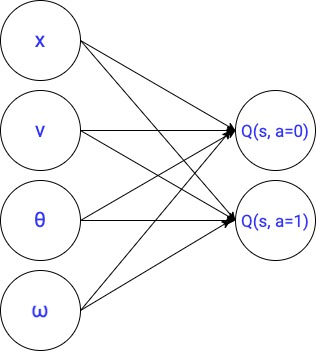

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [2]:
import gym
env = gym.make('CartPole-v1', render_mode = 'rgb_array')

## Hyperparameters

In [3]:
# Bad hyper-parameters
hparams = {
    'learning_rate': 9.214691713730938e-05,
    'discount_factor': 0.99,
    'batch_size': 32,
    'memory_size': 10000,
    'freq_steps_train': 16,
    'freq_steps_update_target': 1000,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 1,
    'max_grad_norm': 1,
    'normalize_state': True,
    'epsilon_start': 0.9,
    'epsilon_end': 0.08474621504763855,
    'steps_epsilon_decay': 100000
}

SEED = 4291201652

## ⚠️ Fix random seeds

In [4]:
from utils import set_seed
set_seed(env, SEED)

## QAgent

In [6]:
from q_agent import QAgent
agent = QAgent(env, **hparams)

10 parameters


## Train the agent 🏋️

In [8]:
from loops import train
train(agent, env, n_episodes=2000)

 12%|█▏        | 237/2000 [00:01<00:12, 143.06it/s]

Reward mean: 25.55, std: 12.24
Num steps mean: 25.55, std: 12.24


 21%|██        | 424/2000 [00:02<00:11, 132.99it/s]

Reward mean: 24.16, std: 11.83
Num steps mean: 24.16, std: 11.83


 31%|███       | 622/2000 [00:03<00:10, 127.48it/s]

Reward mean: 20.63, std: 11.81
Num steps mean: 20.63, std: 11.81


 42%|████▏     | 834/2000 [00:05<00:10, 115.10it/s]

Reward mean: 21.15, std: 12.43
Num steps mean: 21.15, std: 12.43


 51%|█████▏    | 1025/2000 [00:06<00:08, 121.21it/s]

Reward mean: 20.12, std: 11.89
Num steps mean: 20.12, std: 11.89


 61%|██████    | 1222/2000 [00:07<00:05, 131.55it/s]

Reward mean: 20.04, std: 12.25
Num steps mean: 20.04, std: 12.25


 71%|███████   | 1422/2000 [00:09<00:04, 119.99it/s]

Reward mean: 22.81, std: 12.40
Num steps mean: 22.81, std: 12.40


 81%|████████  | 1616/2000 [00:10<00:03, 96.50it/s] 

Reward mean: 22.19, std: 11.74
Num steps mean: 22.19, std: 11.74


 91%|█████████ | 1815/2000 [00:12<00:01, 95.95it/s] 

Reward mean: 24.36, std: 12.07
Num steps mean: 24.36, std: 12.07


100%|██████████| 2000/2000 [00:13<00:00, 146.50it/s]

Reward mean: 26.22, std: 12.67
Num steps mean: 26.22, std: 12.67


## Evaluate the agent ⏱️

In [9]:
from loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.01
)

100%|██████████| 1000/1000 [00:02<00:00, 385.42it/s]


In [10]:
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 26.20, std 12.40


## Let's see how far we got in each attempt

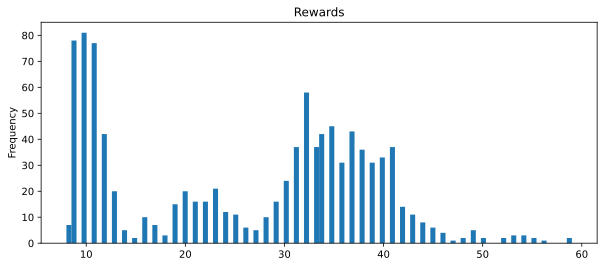

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()